In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    print(col, '-->', data[col].nunique())

Surname --> 2932
Geography --> 3
Gender --> 2


In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


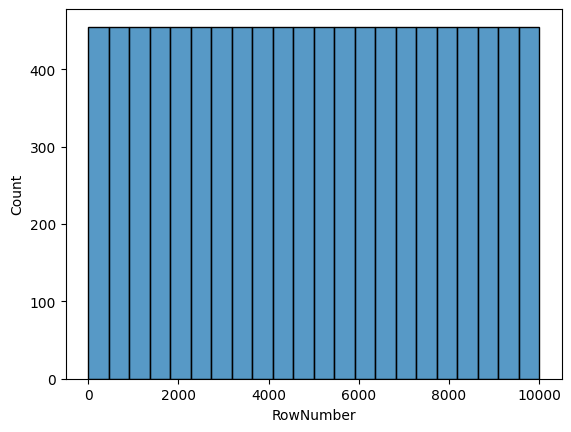

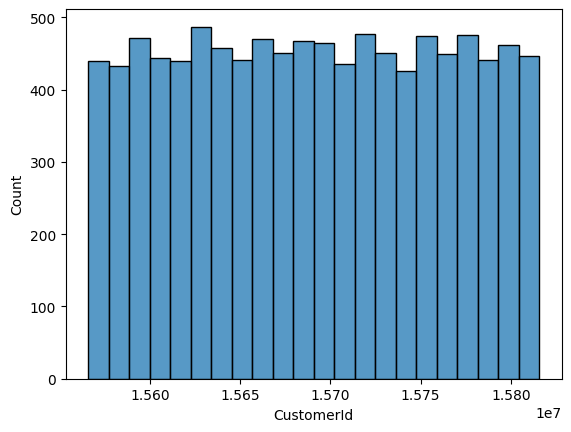

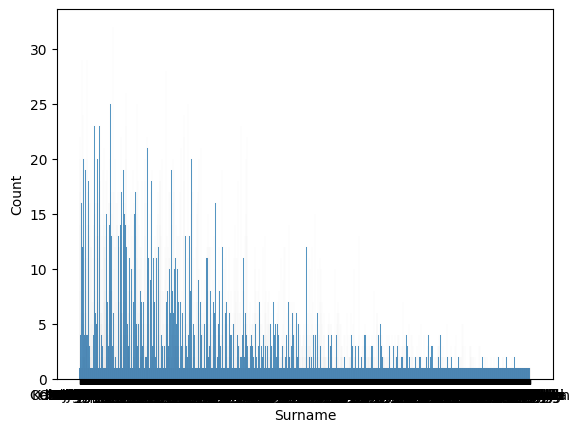

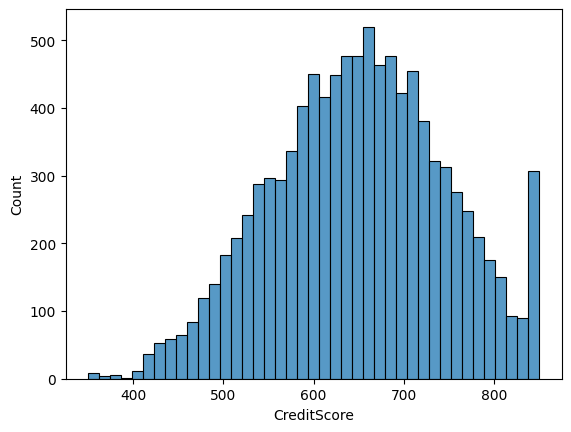

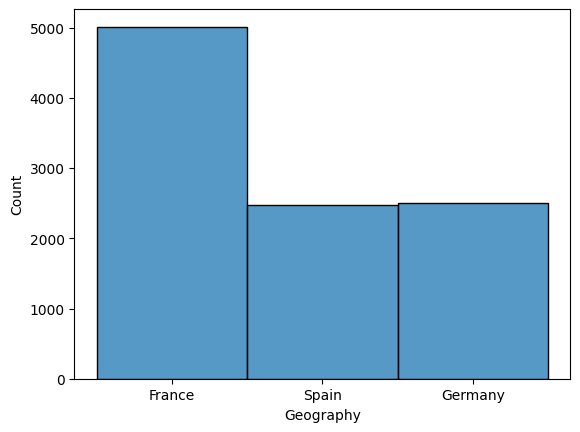

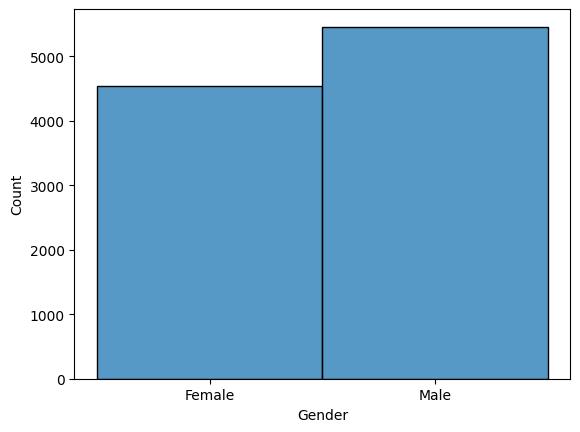

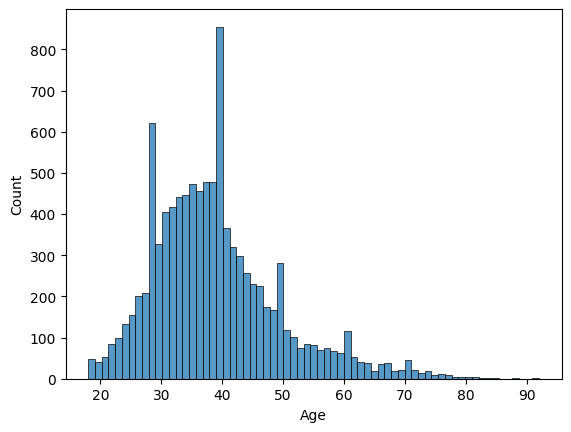

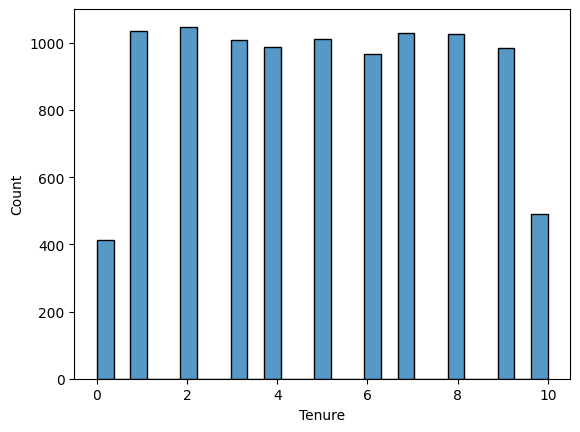

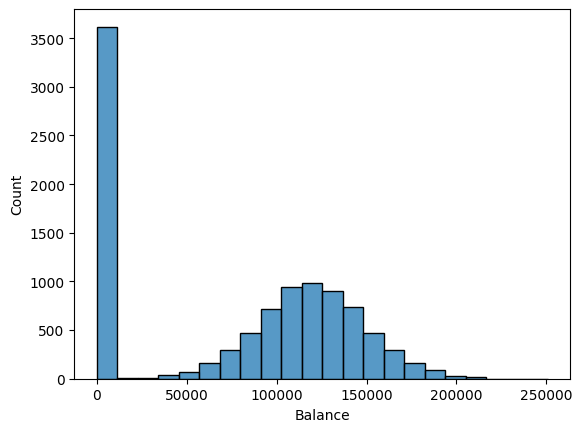

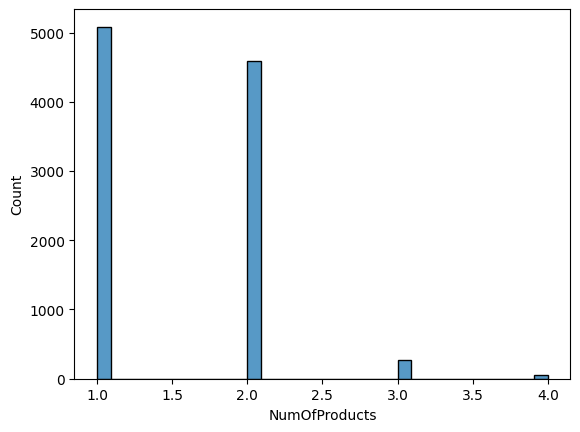

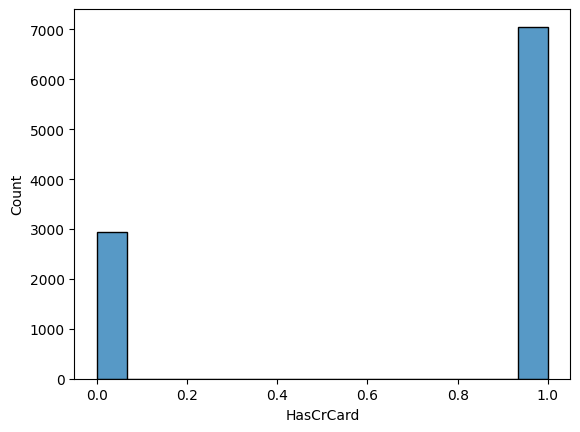

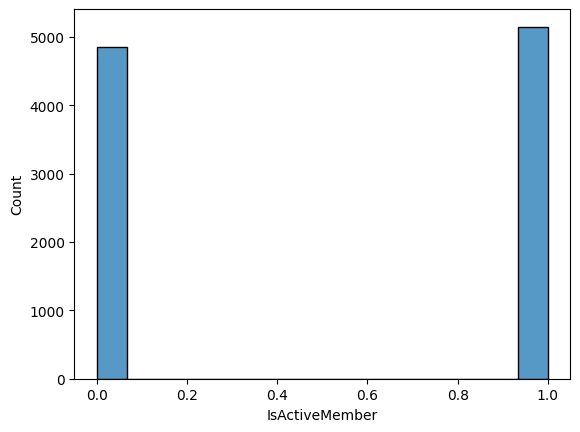

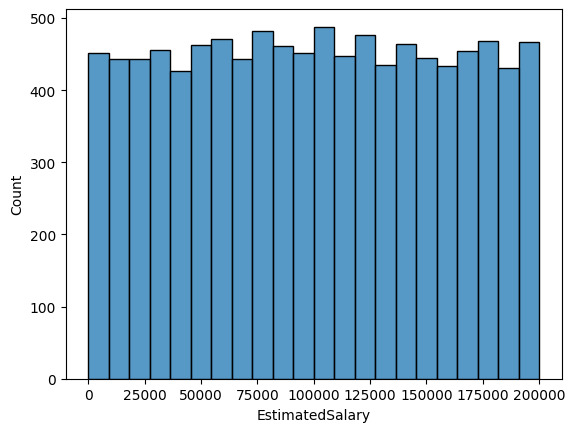

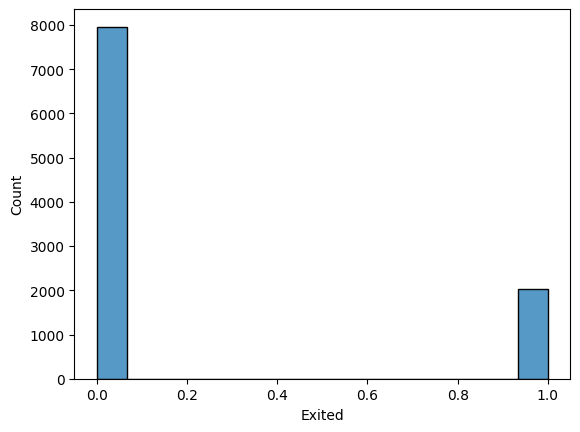

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in data.columns:
  sns.histplot(data[col])
  plt.show()

In [ ]:
# Summary statistics
summary = data.describe()
print(summary)

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

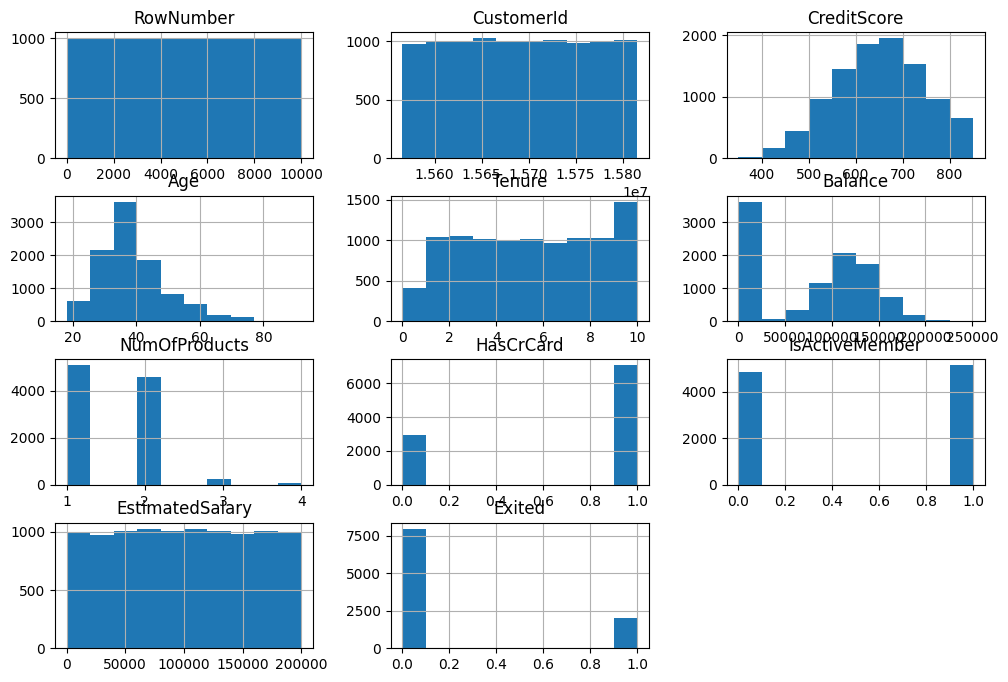

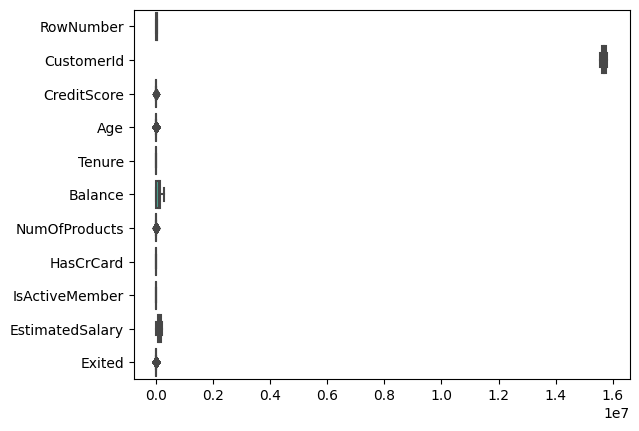

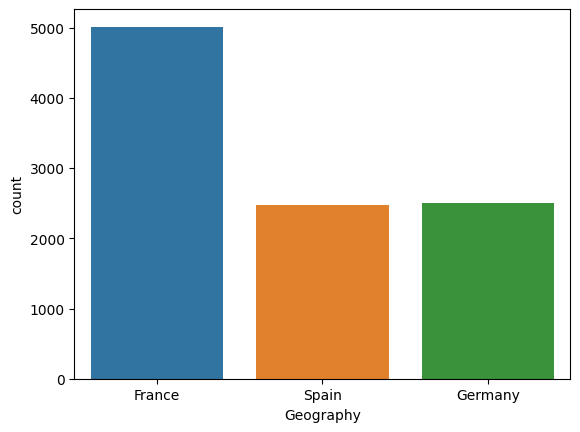

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of numerical features
data.hist(figsize=(12, 8))
plt.show()

# Box plots to identify outliers
sns.boxplot(data=data, orient="h")
plt.show()

# Count plot for categorical features
sns.countplot(data=data, x="Geography")
plt.show()

<ipython-input-20-30bc9e33149d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


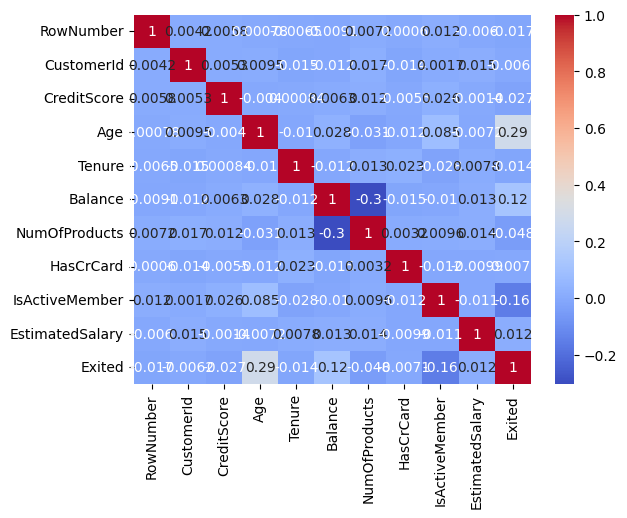

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# Correlation with the target variable
correlation_with_target = correlation_matrix["Exited"].sort_values(ascending=False)
print(correlation_with_target)

In [ ]:
# Class distribution
class_distribution = data["Exited"].value_counts()
print(class_distribution)

0    7963
1    2037
Name: Exited, dtype: int64


In [ ]:
# Detect outliers (e.g., using IQR)
Q1 = data.quantile(0.2)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Age                 319
Balance               0
CreditScore           0
CustomerId            0
EstimatedSalary       0
Exited             2037
Gender                0
Geography             0
HasCrCard             0
IsActiveMember        0
NumOfProducts        60
RowNumber             0
Surname               0
Tenure                0
dtype: int64


<ipython-input-23-1072e80b169f>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.2)
<ipython-input-23-1072e80b169f>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-23-1072e80b169f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()


In [ ]:
# Exclude non-numeric columns like 'Surname'
X = data.drop(columns=["Exited", "Surname"])

In [ ]:
# Split data into features and target (Exited)
y = data["Exited"]

In [ ]:
# Perform one-hot encoding for categorical variables
label_encoder = LabelEncoder()
X["Geography"] = label_encoder.fit_transform(X["Geography"])
X["Gender"] = label_encoder.fit_transform(X["Gender"])

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the RNN model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Reshape the data for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 4s 8ms/step - loss: 0.5283 - accuracy: 0.7945 - val_loss: 0.5039 - val_accuracy: 0.8035
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5031 - accuracy: 0.7945 - val_loss: 0.4729 - val_accuracy: 0.8040
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.4746 - accuracy: 0.8029 - val_loss: 0.4513 - val_accuracy: 0.8100
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.4626 - accuracy: 0.8094 - val_loss: 0.4416 - val_accuracy: 0.8180
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.4514 - accuracy: 0.8158 - val_loss: 0.4357 - val_accuracy: 0.8150
Epoch 6/10
250/250 [==============================] - 3s 10ms/step - loss: 0.4431 - accuracy: 0.8135 - val_loss: 0.4301 - val_accuracy: 0.8225
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.4327 - accuracy: 0.8184 - val_loss: 0.4181 - val_accuracy: 0.8300
Epoch

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

63/63 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8360
Test Loss: 0.39868223667144775, Test Accuracy: 0.8360000252723694
